# Problem 4.3

Use equations 4.27, 4.28, and 4.32 to construct $Y_0^0$ and $Y_2^1$. Check that they are normalized and orthogonal.

In [2]:
import sympy as sp
from sympy.physics.quantum.constants import hbar
from scipy.misc import factorial
sp.init_printing()

#equation 4.27
def legendre(l, x):
    coef = 1 / (factorial(l)*2**l)
    return coef * sp.diff((x**2 - 1)**l, x, l)

#equation 4.28
def asslegendre(l, m, x):
    return (1-x**2)**(sp.Abs(m)/2)*sp.diff(legendre(l, x), x, (sp.Abs(m)))
    
    
    

In [3]:
x = sp.symbols('x', real=True, positive = True)
sp.simplify(asslegendre(3,2,sp.cos(x)))

This is exactly what we expect for our solutions, testing the first few combinations of $l$ and $m$ listed in the text. Now that we have our legendre polynomials and associated legendre polynomials, we need to apply this to the $\theta$ and $\phi$ dependent Schrodinger solutions.

In [4]:
def Y(l, m, theta, phi):
    mabs = sp.Abs(m)
    coef = sp.sqrt((2*l+1)*factorial(l-m)/(4*sp.pi*factorial(l+m)))
    if m > 0:
        return (-1)**m*coef*asslegendre(l,m,sp.cos(theta)) * sp.exp((0.0+1.0j)*m*phi)
    else:
        return sp.simplify(coef*asslegendre(l,m,sp.cos(theta)) * sp.exp((0.0+1.0j)*m*phi))

In [5]:
theta, phi = sp.symbols('theta phi', real = True, positive = True)
Y00 = Y(0, 0, theta, phi)
Y00

This is mathematically equivalent to $\frac{1}{\sqrt{pi}}$. I'm gonna store this so I don't have to calculat it twice when I integrate.

In [6]:
Y32 = Y(3,2, theta, phi)
Y32

Again, the simplification changes the answer slightly, but the long decimal is equivalent to the one in the table in the book.

In [7]:
sp.integrate(sp.integrate(sp.conjugate(Y32)*Y32*sp.sin(theta), (theta, 0, sp.pi)), (phi, 0, 2*sp.pi))

In [8]:
sp.integrate(sp.integrate(sp.conjugate(Y00)*Y00*sp.sin(theta), (theta, 0, sp.pi)), (phi, 0, 2*sp.pi))

Equals 1. Done. Normalized~

# Problem 4.5

Use equation 4.32 to construct $Y_1^1 (\theta,\phi)$ and $Y_3^2 (\theta, \phi)$. Check that they satisfy the angular equation for the appropriate $l$ and $m$.

Equation 4.18: $$ \frac{\partial}{\partial\theta}sin\theta\frac{\partial Y}{\partial \theta}+\frac{1}{sin\theta}\frac{\partial^2 Y}{\partial\phi^2} = -l(l+1)sin(\theta)Y$$

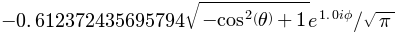

In [9]:
Y11 = Y(1, 1, theta, phi)
Y11

In [10]:
sp.sqrt(sp.sin(theta)**2)

In [21]:
lhs = sp.simplify(sp.diff(sp.sin(theta)*sp.diff(Y11, theta), theta) + 1/sp.sin(theta)*sp.diff(Y11, phi, 2))
lhs

In [22]:
rhs = sp.simplify(-2*Y11*sp.sin(theta))
rhs

In [23]:
rhs - lhs

In [26]:
Y32 = Y(3, 2, theta, phi)
Y32

In [27]:
lhs = sp.simplify(sp.diff(sp.sin(theta)*sp.diff(Y32, theta), theta) + 1/sp.sin(theta)*sp.diff(Y32, phi, 2))
lhs

In [30]:
rhs = sp.simplify(-12*Y32*sp.sin(theta))
rhs

In [31]:
rhs - lhs

$Y_1^1$ and $Y_3^2$ satisfy the angular Schrodinger equation. Cool.